# Imports

In [2]:
import openml as oml
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from pandas.api.types import is_numeric_dtype
from random import seed
from random import randrange
from math import sqrt
from numpy import array
from numpy.linalg import norm
from matplotlib.colors import ListedColormap
from collections import Counter
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.model_selection import train_test_split, \
 cross_val_score, GridSearchCV, RandomizedSearchCV,cross_validate,LeaveOneOut
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, mean_absolute_error,\
mean_squared_error, r2_score, f1_score,ConfusionMatrixDisplay,roc_curve,roc_auc_score, auc
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

# KNN - Classes

### KNN - Caso Base (euclidean distance)

In [3]:
class KNN_Base:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        # compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        unique_classes,counts=np.unique(k_nearest_labels, return_counts=True)
        most_frequent_label=unique_classes[np.argmax(counts)]
        return most_frequent_label
    
    def predict_proba(self, X):
        y_proba = []
        for sample in X:
            distances = np.sqrt(np.sum(((self.X_train - sample)) ** 2, axis=1))
            sorted_indices = np.argsort(distances)
            k_indices = sorted_indices[:self.k]
            k_nearest_classes = self.y_train[k_indices]
            unique_classes, counts = np.unique(k_nearest_classes, return_counts=True)
            class_frequencies = counts / self.k  # relative frequency of the classes
            y_proba.append(class_frequencies)
        return np.array(y_proba)

### KNN -  Bagging (diferentes distâncias)

In [4]:
class KNN_Bagging:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X,i):
        predictions = list()
        for x in X:
            if i==0:
                # calculate distances to all training examples
                distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

                # get k-nearest neighbors
                k_indices = np.argsort(distances)[:self.k]
                k_nearest_labels = [self.y_train[i] for i in k_indices]
                unique_classes,counts=np.unique(k_nearest_labels, return_counts=True)
                most_frequent_label=unique_classes[np.argmax(counts)]
                predictions.append(most_frequent_label)
                
            elif i==1:
                # calculate distances to all training examples
                distances = [cosine_similarity(x, x_train) for x_train in self.X_train]

                # get k-nearest neighbors
                k_indices = np.argsort(distances)[:self.k]
                k_nearest_labels = [self.y_train[i] for i in k_indices]
                unique_classes,counts=np.unique(k_nearest_labels, return_counts=True)
                most_frequent_label=unique_classes[np.argmax(counts)]
                predictions.append(most_frequent_label)
                
            elif i==2:
                # calculate distances to all training examples
                distances = [manhattan_distance(x, x_train) for x_train in self.X_train]

                # get k-nearest neighbors
                k_indices = np.argsort(distances)[:self.k]
                k_nearest_labels = [self.y_train[i] for i in k_indices]
                unique_classes,counts=np.unique(k_nearest_labels, return_counts=True)
                most_frequent_label=unique_classes[np.argmax(counts)]
                predictions.append(most_frequent_label)
                
            elif i==3:
                # calculate distances to all training examples
                distances = [jaccard_distance(x, x_train) for x_train in self.X_train]

                # get k-nearest neighbors
                k_indices = np.argsort(distances)[:self.k]
                k_nearest_labels = [self.y_train[i] for i in k_indices]
                unique_classes,counts=np.unique(k_nearest_labels, return_counts=True)
                most_frequent_label=unique_classes[np.argmax(counts)]
                predictions.append(most_frequent_label)
                
            elif i==4:
                distances = list()
                for x_train in self.X_train:
                    xMm = x_train - np.mean(self.X_train, axis=0)
                    cov = np.cov(np.transpose(self.X_train))
                    invcoveM = np.linalg.inv(cov)
                    np.set_printoptions(suppress=True)
                    tem1 = np.dot(xMm,invcoveM)
                    tem2 = np.dot(tem1, np.transpose(xMm))
                    MD = np.sqrt(tem2)
                    resultado = np.reshape(MD,-1)
                    resultado_final = float(np.reshape(MD,-1))
                    distances.append(resultado_final)
                # get k-nearest neighbors
                k_indices = np.argsort(distances)[:self.k]
                k_nearest_labels = [self.y_train[i] for i in k_indices]
                unique_classes,counts=np.unique(k_nearest_labels, return_counts=True)
                most_frequent_label=unique_classes[np.argmax(counts)]
                most_common_str = str(most_frequent_label)
                predictions.append(most_common_str)
                
        return predictions

    def predict_proba(self, X):
        y_proba = []
        for sample in X:
            distances = np.sqrt(np.sum(((self.X_train - sample)) ** 2, axis=1))
            sorted_indices = np.argsort(distances)
            k_indices = sorted_indices[:self.k]
            k_nearest_classes = self.y_train[k_indices]
            unique_classes, counts = np.unique(k_nearest_classes, return_counts=True)
            class_frequencies = counts / self.k  # relative frequency of the classes
            y_proba.append(class_frequencies)
        return np.array(y_proba)

# KNN - Features (diferentes atributos)

In [5]:
class KNN_Features:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions
    
    def _predict(self, x):
        predictions = list()
        distances = [euclidean_distance_features(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train.reset_index(drop=True)[i] for i in k_indices]
        k_nearest_labels = list(self.y_train.reset_index(drop=True).iloc[k_indices.ravel()])
        unique_classes,counts=np.unique(k_nearest_labels, return_counts=True)
        most_frequent_label=unique_classes[np.argmax(counts)]
        most_common_str = str(most_frequent_label)
        predictions.append(most_common_str)
        return predictions

    def predict_proba(self, X):
        y_proba = []
        for sample in X:
            distances = np.sqrt(np.sum(((self.X_train - sample)) ** 2, axis=1))
            sorted_indices = np.argsort(distances)
            k_indices = sorted_indices[:self.k]
            k_nearest_classes = self.y_train[k_indices]
            unique_classes, counts = np.unique(k_nearest_classes, return_counts=True)
            class_frequencies = counts / self.k  # relative frequency of the classes
            y_proba.append(class_frequencies)
        return np.array(y_proba)


# Cálculo das Distâncias

In [6]:
def euclidean_distance(p1, p2):
    P1 = np. array(p1)
    P2 = np. array(p2)
    temp = P1 - P2
    euclid_dist = np. sqrt(np.dot(temp.T, temp))
    return euclid_dist


In [7]:
def euclidean_distance_features(p1, p2):
    temp = p1 - p2[:, np.newaxis]
    euclid_dist = np.sqrt(np.sum(temp ** 2, axis=-1))
    return euclid_dist

In [8]:
def cosine_similarity(row1, row2):
    norm1 = norm(row1)
    norm2 = norm(row2)
    if norm1 == 0 or norm2 == 0:
        return 0  # avoid zero division
    simi = np.dot(row1, row2) / (norm1 * norm2)
    return simi

In [9]:
def manhattan_distance(a,b):
    return sum(abs(val1-val2) for val1,val2 in zip(a,b))

In [10]:
def jaccard_distance(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1)+len(list2))-intersection
    return float(intersection)/union

# Estatísticas de Teste

In [11]:
def plot_ds2D(X,y):
    pca = PCA(n_components=2)
    pca_features = pca.fit_transform(X)
    
    pca_df = pd.DataFrame(
        data=pca_features, 
        columns=['PC1', 'PC2'])
    pca_df['target'] = y
    pca_df['target'] = pca_df['target']
    
    sns.scatterplot(x=pca_df['PC1'],y=pca_df['PC2'],hue=pca_df['target'],palette="deep")
    plt.title('2D PCA Graph')
    plt.show()

In [12]:
def plot_cm(model_fit,X_test,y_test,y_train,predictions):
    # Obtain unique classes
    y_pred = predictions
    unique_classes = np.unique(y_train)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=unique_classes)
    disp.plot()
    

In [13]:
def find_k_knn(X,y,caso,kmax=10):
    k_values = [i for i in range (1,kmax+1)]
    accuracies = list()
    for k in k_values:
        if caso == 1:
            knn = KNN_Base(k)
            accuracy,y_test,predictions,X_test,clf,X,Y,y_train = treino_caso_base(dataset,k)
        elif caso == 2:
            knn = KNN_Bagging(k)
            accuracy,y_test,predictions,X_test,clf,X,Y,y_train = treino_bagging(dataset,k)
        else:
            knn = KNN_Features(k)
            accuracy,y_test,predictions,X_test,clf,X,Y,y_train = treino_features(dataset,k)
        accuracies.append(accuracy)

    #Ploting the results of Cross Validation
    sns.lineplot(x = k_values, y = accuracies, marker = 'o')
    plt.xlabel("K Values")
    plt.ylabel("Accuracy Score of k-NN")
    plt.title('Estimates by Cross Validation')
    
    best_index = np.argmax(accuracies)    
    best_k = k_values[best_index]    
    print(f'Best k = {best_k}')

In [14]:
def plot_roc_curve(clf,X_test,y_test):

    #obtain the probabilities (first column)
    y_pred_prob = clf.predict_proba(X_test)
    first_columns = [p[0] for p in y_pred_prob]

    #convert no numeric
    my_label = preprocessing.LabelEncoder() 
    y_test_encoded = my_label.fit_transform(y_test)
    fpr, tpr,_= roc_curve(y_test_encoded, first_columns)
    auc = roc_auc_score(y_test_encoded, first_columns)

    #create ROC curve
    plt.plot(fpr,tpr, label="AUC="+str(round(auc,3)))
    plt.plot(np.linspace(0,1,5),np.linspace(0,1,5),linestyle='--',linewidth=2)
    plt.title('ROC Curve')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()

# Comparação Entre os Modelos

In [15]:
def find_k_knn_comparacao(X,y,kmax=10):
    k_values = [i for i in range (1,kmax+1)]
    accuracies_base = list()
    accuracies_bagging = list()
    accuracies_features = list()
    for k in k_values:
        knn_base = KNN_Base(k)
        knn_bagging = KNN_Bagging(k)
        knn_features = KNN_Features(k)
        
        accuracy_base,y_test,predictions,X_test,clf,X,Y,y_train = treino_caso_base(dataset,k)
        accuracy_bagging,y_test,predictions,X_test,clf,X,Y,y_train = treino_bagging(dataset,k)
        accuracy_features,y_test,predictons,X_test,clf,X,Y,y_train = treino_features(dataset,k)
        
        accuracies_base.append(accuracy_base)
        accuracies_bagging.append(accuracy_bagging)
        accuracies_features.append(accuracy_features)

    #Ploting the results of Cross Validation
    sns.lineplot(x = k_values, y = accuracies_base, marker = 'o')
    sns.lineplot(x = k_values, y = accuracies_bagging, marker = 'o')
    sns.lineplot(x = k_values, y = accuracies_features, marker = 'o')
    plt.xlabel("K Values")
    plt.ylabel("Accuracy Score of k-NN")
    plt.title('Estimates by Cross Validation')
    
    best_index_base = np.argmax(accuracies_base)    
    best_k_base = k_values[best_index_base] 
    best_index_bagging = np.argmax(accuracies_bagging)    
    best_k_bagging = k_values[best_index_bagging] 
    best_index_features = np.argmax(accuracies_features)    
    best_k_features = k_values[best_index_features] 
    print(f'Best k Caso Base = {best_k_base}')
    print(f'Best k Bagging = {best_k_bagging}')
    print(f'Best k Features = {best_k_features}')

# Função Geral

In [16]:
def estatisticas(dataset,k,caso):
    if caso == 1:
        accuracy,y_test,predictions,X_test,clf,X,Y,y_train = treino_caso_base(dataset,k)
    elif caso == 2:
        accuracy,y_test,predictions,X_test,clf,X,Y,y_train = treino_bagging(dataset,k)
    else:
        accuracy,y_test,predictions,X_test,clf,X,Y,y_train = treino_features(dataset,k)
        
    precision = precision_score(y_test, predictions, average='weighted', zero_division=1)
    recall = recall_score(y_test, predictions, average='weighted')
    er = 1-accuracy
    cm1 = confusion_matrix(y_test, predictions)
    sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    if not is_numeric_dtype(y_test):
        f1 = f1_score(y_test, predictions, average='weighted')
        print("F1-score:", f1)
        
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("Error Rate:",er)
    print('Sensitivity:', sensitivity)
    print('Specificity:', specificity)
    find_k_knn(X,Y,caso)

In [17]:
def estatisticas_2d_matrix(dataset,k,caso):
    if caso == 1:
        accuracy,y_test,predictions,X_test,clf,X,Y,y_train = treino_caso_base(dataset,k)
    elif caso == 2:
        accuracy,y_test,predictions,X_test,clf,X,Y,y_train = treino_bagging(dataset,k)
    else:
        accuracy,y_test,predictions,X_test,clf,X,Y,y_train = treino_features(dataset,k)
        
    precision = precision_score(y_test, predictions, average='weighted', zero_division=1)
    recall = recall_score(y_test, predictions, average='weighted')
    er = 1-accuracy
    cm1 = confusion_matrix(y_test, predictions)
    sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    plot_ds2D(X,Y)
    plot_cm(clf,X_test,y_test,y_train,predictions)

In [18]:
def estatisticas_roc_curve(dataset,k,caso):
    if caso == 1:
        accuracy,y_test,predictions,X_test,clf,X,Y,y_train = treino_caso_base(dataset,k)
    elif caso == 2:
        accuracy,y_test,predictions,X_test,clf,X,Y,y_train = treino_bagging(dataset,k)
    else:
        accuracy,y_test,predictions,X_test,clf,X,Y,y_train = treino_features(dataset,k)
        
    precision = precision_score(y_test, predictions, average='weighted', zero_division=1)
    recall = recall_score(y_test, predictions, average='weighted')
    er = 1-accuracy
    cm1 = confusion_matrix(y_test, predictions)
    sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    plot_roc_curve(clf,X_test,y_test)

In [19]:
def estatisticas_comparacao(dataset,k,caso):
    if caso == 1:
        accuracy,y_test,predictions,X_test,clf,X,Y,y_train = treino_caso_base(dataset,k)
    elif caso == 2:
        accuracy,y_test,predictions,X_test,clf,X,Y,y_train = treino_bagging(dataset,k)
    else:
        accuracy,y_test,predictions,X_test,clf,X,Y,y_train = treino_features(dataset,k)
        
    precision = precision_score(y_test, predictions, average='weighted', zero_division=1)
    recall = recall_score(y_test, predictions, average='weighted')
    er = 1-accuracy
    cm1 = confusion_matrix(y_test, predictions)
    sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])

    find_k_knn_comparacao(X,Y)

# Treino dos Dados

### Treino dos Dados - Caso Base

In [20]:
def treino_caso_base(dataset,k):
    
    X, y, categorical_indicator, attribute_names = dataset.get_data(target=dataset.default_target_attribute)
    df = pd.DataFrame(X, columns=attribute_names)
    numeric_cols = [c for c in df.columns if is_numeric_dtype(df[c])]
    X = df[numeric_cols].values
    Y = y.to_numpy()

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

    clf = KNN_Base(k)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)

    #print("predictions: ", predictions)
    
    result = Counter(predictions).most_common(1)[0][0]
     
    accuracy = accuracy_score(y_test, predictions)
    return accuracy,y_test,predictions,X_test,clf,X,Y,y_train

### Treino dos Dados - Bagging

In [21]:
def treino_bagging(dataset,k):    
    X, y, categorical_indicator, attribute_names = dataset.get_data(target=dataset.default_target_attribute)
    df = pd.DataFrame(X, columns=attribute_names)
    numeric_cols = [c for c in df.columns if is_numeric_dtype(df[c])]
    X = df[numeric_cols].values
    Y = y.to_numpy()

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)
        

    clf = KNN_Bagging(k)
    clf.fit(X_train, y_train)

    predictions_general = []

    for i in range(5):
        if i==0:
            name = 'Euclidean Distance'
        elif i==1:
            name = 'Cosine Similarity'
        elif i==2:
            name = 'Manhattan Distance'
        elif i==3:
            name = 'Jaccard Distance'
        elif i==4:
            name = 'Mahalanobis Distance'

        predictions = clf.predict(X_test, i)
        #print(f"{name} prediction: {predictions}")
        most_common = Counter(predictions).most_common(1)[0][0]
        predictions_general.append(most_common)

    accuracy = accuracy_score(y_test, predictions)

    return accuracy,y_test,predictions,X_test,clf,X,Y,y_train

### Treino dos Dados - Features

In [22]:
def knn_ensemble_bagging(X, y, n_neighbors, n_classifiers, sample_size):
    
    #subconjuntos de features aleatórias para cada classificador
    n_samples, n_features = X.shape
    feature_subsets = [np.random.choice(range(n_features), int(sample_size * n_features), replace=False) for _ in range(n_classifiers)]
    classifiers = []

    # creat a trainning sample with resampling
    for features in feature_subsets:
        X_subset = X[:, features]
        X_resampled, y_resampled = resample(X_subset, y, n_samples=int(sample_size * n_samples), replace=True, random_state=42)
        cls = KNN_Features(5)
        cls.fit(X_resampled, y_resampled)
        classifiers.append(cls)
    
    #Ensemble of classifiers
    ensemble = Counter(classifiers).most_common(1)[0][0]
    
    return ensemble,cls




def treino_features(dataset,k):
    
    # Assuming X and y are the feature data and target labels, respectively
    X, y, categorical_indicator, attribute_names = dataset.get_data(target=dataset.default_target_attribute)
    df = pd.DataFrame(X, columns=attribute_names)
    numeric_cols = [c for c in df.columns if is_numeric_dtype(df[c])]
    X = df[numeric_cols].values
    Y = y.to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
    
    # Creating the KNN ensemble using bagging
    ensemble,clf = knn_ensemble_bagging(X, y, k, 5, 0.8)
    # Using the ensemble to make predictions
    predictions = ensemble.predict(X_test)

    # Evaluating the ensemble performance
    accuracy = accuracy_score(y_test, predictions)
    
    return accuracy,y_test,predictions,X_test,clf,X,Y,y_train

# Teste em Datasets

### Dataset 1

#### Estatísticas Knn Base

F1-score: 0.5784563918757467
Accuracy: 0.63
Precision: 0.56097372633958
Recall: 0.63
Error Rate: 0.37
Sensitivity: 0.1276595744680851
Specificity: 0.8592233009708737
Best k = 7


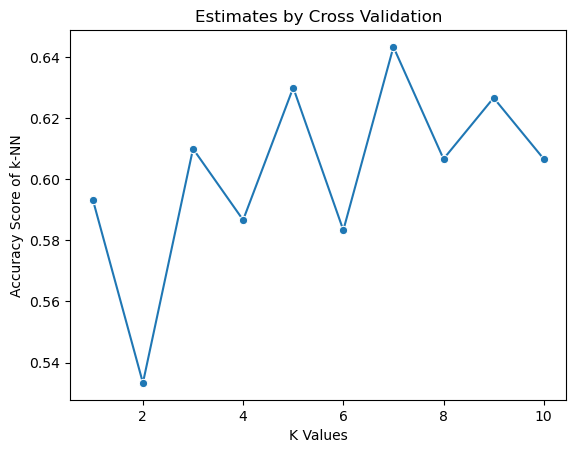

In [23]:
dataset = oml.datasets.get_dataset(31) 
caso = 1 # 1-caso_base 2-bagging 3-features
estatisticas(dataset,5,caso)

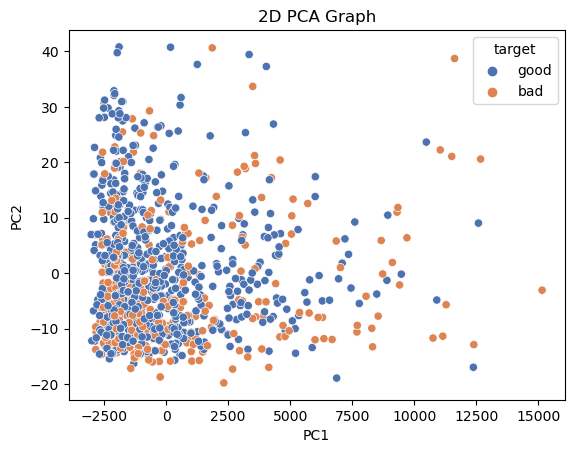

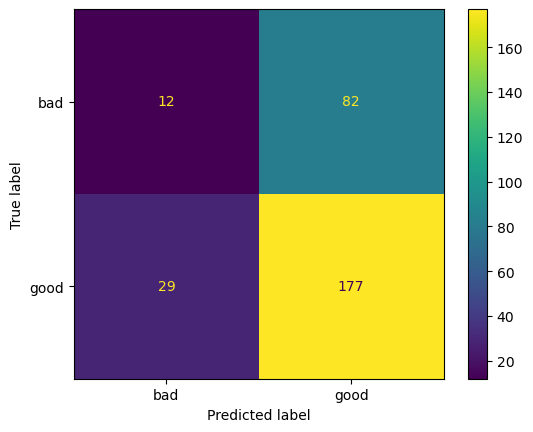

In [24]:
estatisticas_2d_matrix(dataset,5,caso)

C:\Users\carlo\AppData\Local\Temp\ipykernel_11968\2166633411.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(y_proba)


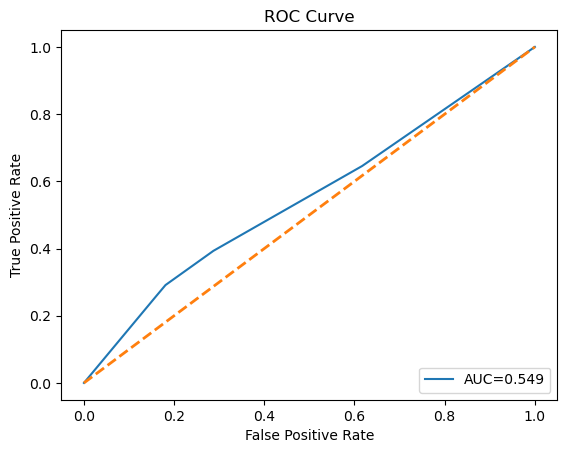

In [25]:
estatisticas_roc_curve(dataset,5,caso)

#### Estatísticas Knn - Bagging

In [ ]:
caso = 2
estatisticas(dataset,5,caso)

F1-score: 0.5591040843214757
Accuracy: 0.6866666666666666
Precision: 0.7848444444444443
Recall: 0.6866666666666666
Error Rate: 0.31333333333333335
Sensitivity: 0.0
Specificity: 1.0


In [ ]:
estatisticas_2d_matrix(dataset,5,caso)

In [ ]:
estatisticas_roc_curve(dataset,5,caso)

#### Estatísticas Knn - Features

In [ ]:
caso = 3
estatisticas(dataset,5,caso)

In [ ]:
estatisticas_2d_matrix(dataset,5,caso)

In [ ]:
estatisticas_comparacao(dataset,5,caso)

### Dataset 2

#### Estatísticas Knn Base

In [ ]:
dataset = oml.datasets.get_dataset(37) 
caso = 1 # 1-caso_base 2-bagging 3-features
estatisticas(dataset,5,caso)

In [ ]:
estatisticas_2d_matrix(dataset,5,caso)

#### Estatísticas Knn - Bagging

In [ ]:
caso = 2
estatisticas(dataset,5,caso)

In [ ]:
estatisticas_2d_matrix(dataset,5,caso)

#### Estatísticas Knn - Features

In [ ]:
caso = 3
estatisticas(dataset,5,caso)

In [ ]:
estatisticas_2d_matrix(dataset,5,caso)

In [ ]:
estatisticas_comparacao(dataset,5,caso)

### Dataset 3

#### Estatísticas Knn Base

In [ ]:
dataset = oml.datasets.get_dataset(43) 
caso = 1 
estatisticas(dataset,5,caso)

In [ ]:
estatisticas_2d_matrix(dataset,5,caso)

In [ ]:
estatisticas_roc_curve(dataset,5,caso)

#### Estatísticas Knn - Bagging

In [ ]:
caso = 2
estatisticas(dataset,5,caso)

In [ ]:
estatisticas_2d_matrix(dataset,5,caso)

In [ ]:
estatisticas_roc_curve(dataset,5,caso)

In [ ]:
estatisticas_comparacao(dataset,5,caso)

#### Estatísticas Knn - Features

In [ ]:
caso = 3
estatisticas(dataset,5,caso)

In [ ]:
estatisticas_2d_matrix(dataset,5,caso)

In [ ]:
estatisticas_comparacao(dataset,5,caso)

### Dataset 4

#### Estatísticas Knn Base

In [ ]:
dataset = oml.datasets.get_dataset(12) 
caso = 1 
estatisticas(dataset,5,caso)

In [ ]:
estatisticas_2d_matrix(dataset,5,caso)

#### Estatísticas Knn - Bagging

In [ ]:
caso = 2
estatisticas(dataset,5,caso)

In [ ]:
estatisticas_2d_matrix(dataset,5,caso)

In [ ]:
estatisticas_roc_curve(dataset,5,caso)

In [ ]:
estatisticas_comparacao(dataset,5,caso)

#### Estatísticas Knn - Features

In [ ]:
caso = 3
estatisticas(dataset,5,caso)

In [ ]:
estatisticas_comparacao(dataset,5,caso)

### Dataset 5

#### Estatísticas Knn Base

In [ ]:
dataset = oml.datasets.get_dataset(29) 
caso = 1
estatisticas(dataset,5,caso) 

In [ ]:
estatisticas_roc_curve(dataset,5,caso)

#### Estatísticas Knn - Bagging

In [ ]:
caso = 2
estatisticas(dataset,5,caso) 

#### Estatísticas Knn - Features

In [ ]:
caso = 3
estatisticas(dataset,5,caso) 

In [ ]:
estatisticas_comparacao(dataset,5,caso)